In [1]:
import pandas as pd
import numpy as np
import math
import os 

#更改檔案路徑
os.chdir('C:\\Users\\ASUS\\Desktop\\data science\\HW\\hw2_dbscan')

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    distance = ((np.square(p-q)).sum())**0.5
    return distance

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    return _dist(p,q)<= eps

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for i in range(n_points):
        if _eps_neighborhood(m[:,i],m[:,point_id],eps):
            seeds.append(i)
    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
   
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    
    #將所有由point_id擴張的點存到 a list
    a = [point_id]
    
    #這邊為了檢查執行前後的a是否一樣，所以以執行前後次數為判斷
    before = 0
    after = 0
    if min_points > len(_region_query(m, point_id, eps)):
        return False
    while True :
        for i in a:
            if min_points <= len(_region_query(m, i, eps)):
                for j in _region_query(m, i, eps):
                    #不要存重複的點
                    if j not in a:
                        a.append(j)
                        after +=1
        if before == after:
            break
        #如果執行前後的次數相等，跳出迴圈
        else:
            before=after
    for i in a:
        classifications[i] = cluster_id
        
    return True

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for i in range(len(classifications)):
        if classifications[i] == False:
            _expand_cluster(m, classifications, i, cluster_id, eps, min_points)
            cluster_id += 1
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

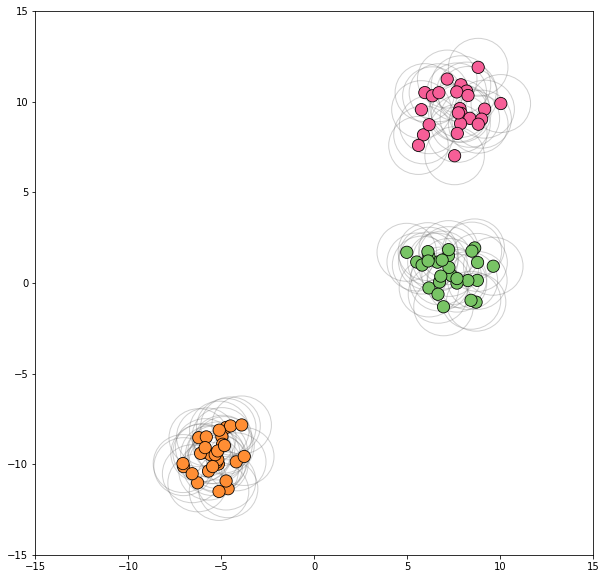

In [10]:
%matplotlib inline
import  dbscan_lab_helper  as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [11]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [12]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

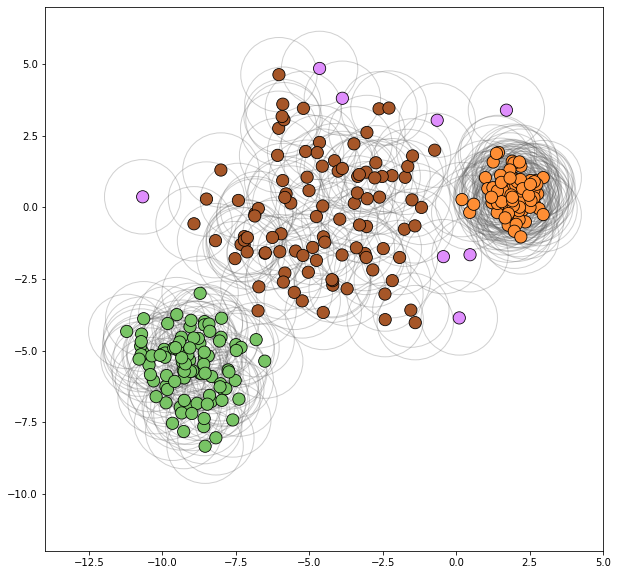

In [14]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
#不知道為什麼有一個群顏色跟圖不一樣